# Исследование объявлений о продаже квартир

В моем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Моя задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [130]:
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)


df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')#df = pd.read_csv('real_estate_data.csv', sep='\t')
display(df.info())
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,...,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,...,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00


### Вывод

В таблице 22 столбца. Тип данных разный, возможно он в каких-то столбцах не оптимален, но разберемся с этим в предобработке.

Согласно документации к данным:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения. Для некоторых пропущенных значений можно предположить логичную замену.

В каждой строке таблицы — данные о объекте недвижимости из сервиса Яндекс.Недвижимость - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.

Предварительно можно утверждать, что данных достаточно для проведения исследовательского анализа.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Исследование и заполнение пропусков в данных

In [131]:
df['ceiling_height'].value_counts()#подозрительно большой и маленький потолок есть 100м и 1м, пока оставим.
df['ceiling_height'].unique()
#заполняю медианами, потому что несильно отличается от среднего и у нас там есть 100м потолок, медиана лучше сожрет этот потолок
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()

Теперь посмотрим что там в этажах:

In [132]:
df['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [133]:
#возможно пропуски это частная собственность, но этажи не общие, а сдаваемой жилплощади заполнены все
#посмотрим, может так и есть
df[(df['floors_total'] == 'nan') & (df['floor'] == 1)]
#таких значений не оказалось
df[(df['floors_total'] == 0) & (df['floor'] == 1)]
#df['floors_total'].unique()
# так как это всего лишь 0,4% данных, решил удалить эти строки
df = df.dropna(subset=['floors_total'])
#df.info()

Переходим к столбцу living_area:

In [134]:
display(df['living_area'].describe())#в принципе почти все значения очень близки к медиане, дикого разброса нет, заменю пропуски медианой
df.loc[df['living_area'].isna(), 'living_area'] = df['living_area']*((df['living_area']/df['total_area']).median())
#df.info()

count   21,743.00
mean        34.46
std         22.04
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64

Посмтрим, что у находится в столбце комнат:

In [135]:
df['rooms'].sort_values().value_counts()
#замечены 194 помещений без комнат
#посмотрим что по этим адресам с жилой площадью и площадью кухни
df.query('rooms == 0').head(15)#у них у всех нет кухни, значит площадь должна на что-то уходить
#решил их всех заменить на единицу, потому что хоть одна жилая комната уж должна быть и логично у студий это тоже будет комната
df.loc[df['living_area'].isna(), 'living_area'] = 1
df.loc[df['rooms'] == 0, 'rooms'] = 1
#df.info()

Смотрим что у нас в апартаментах:

In [136]:
df['is_apartment'].value_counts()#апартаменты - это такой вид недвижимости, которая вроде бы жилая, но прописаться в ней нельзя.
#те, у кого апартаменты обычно хорошо это знают, поэтому пропуски нужно заполнять с помощь значения False.
df.loc[df['is_apartment'].isna(), 'is_apartment'] = False
#df.info()

В пропуски на кухне занесем данные по такой логике: кухня это какой-то процент от общей площади, у жилой площади 

In [137]:
df['total_area'].corr(df['living_area'])#видна линейная взаимосвязь, поэтому и делаю предположение с кухней

0.7968582756884628

In [138]:
df['total_area'].corr(df['kitchen_area'])#у кухни взаимосвязь хуже, но лучше этого мы ничего в слаке не придумали пока что

0.6094677166170354

In [139]:
#df['total_area']*((df['kitchen_area']/df['total_area']).median())

df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df['total_area']*((df['kitchen_area']/df['total_area']).median())
#df.info()

Пропуски в стобце с балконами заполняем нулями, так как наличие балкона - достаточно специфичная информация и продавец скорее всего знает о его наличии, а если там пропуск, значит его нет.

In [140]:
df.loc[df['balcony'].isna(), 'balcony'] = 0
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23613 non-null float64
floors_total            23613 non-null float64
living_area             23613 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null bool
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            23613 non-null float64
balcony                 23613 non-null float64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around3000

Переходим к названиям населенных пунктов. Сначала посмотрим, какие уникальные значения там есть, а потом сотрем все взаимозаменяемые типа поселок, деревня и т.д.(в контексте нашего исследования между ними нет большой разницы, но в жизни вроде есть). Совсем все подтирать не стал, заметил, что такие пролемы есть только в названии поселков и деревень, поэтому пока остановился на таком варианте:

In [141]:
#df.query('locality_name.str.contains("Мурино")').locality_name.unique()
#Метод выше мне посоветовал ревьюер в прошлом проекте, но он не работает, возможно у Вас получится его починить
df['locality_name'].sort_values().unique()#видно плохо, но это все ради того, чтобы Мурино, например, было однозначно определено
for name in ['поселок', 'деревня', 'посёлок']:
         df['locality_name'] = df['locality_name'].str.replace(name, '')
df = df.dropna(subset=['locality_name'])#убрал еще 50 строк, потому что там нет данных о локации, это будет мешать
#делать выводы на основании локации иэто меньше сотой процента данных
#df.info()

Переименуем название колонки с растоянием до центра города

In [142]:
df = df.rename(columns = {'cityCenters_nearest': 'city_сenters_nearest'})
#df.info()
#df.head()

Остальные столбцы трогать не будем, потому что бессмысленно писать среднее значение до пруда, если пруда нет и т.д. С аэропортом посложнее, на самом деле у нас в чате дискуссия на счет того стоит заполнять эти столбцы или нет, говорят, что зависит от ревьюера. Мне кажется, что абсурдно заполнять медианой все пропуски в столбце с аэропортом, в разных городах явно сильно отличающееся медианное расстояние до аэропорта. Но можно сделать группировку по населенным пунктам хотя бы и заполнять по медианам населенных пунктов. Мне кажется, на данный момент, что данных достаточно для анализа, возможно я вернусь сюда еще раз или даже больше.

Апдэйт: недалеко ушел. На инты тип данных не меняется если в столбце есть пропуски. А насколько принципиальны инты в столбцах, ну памяти поменьше займет это да, но в данном проекте это прям принципиально?

In [143]:

def del_nan_group_city(colomn):
 
       for city in df['locality_name'].unique():
             median = df.loc[df['locality_name'] == city, colomn].median()
             df.loc[(df[colomn].isna()) & (df['locality_name'] == city), colomn] = median
                
                
               
            
colomni = ['airports_nearest', 'city_сenters_nearest', 'parks_around3000', 
           'parks_nearest', 'ponds_around3000', 'ponds_nearest']            
for item  in colomni: 
    del_nan_group_city(item)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18133 non-null float64
city_сenters_nearest    18133 non-null float64
parks_around3000        18133 non-null float64
parks_nearest           17579 non-null float64
ponds_around300

Ситуация улучшилась, но проблема в том, что для многих локаций во всех строках NaN в столбцах с расстоянием до аэропорта, парка и пруда. Соответственно, заполнение с группировкой по нас. пунктам не решает проблему полностью. Преподаватель предложил заполнить остатки глобальными медианами. Так и сделаю, другого не придумал пока что. А для столбца days_exposition это использовать бессмысленно, поэтому просто заполним строки с пропусками нулями и будем это иметь ввиду дальше.

In [144]:
for item in ['airports_nearest', 'city_сenters_nearest', 'parks_around3000', 
           'parks_nearest', 'ponds_around3000', 'ponds_nearest']:
         df.loc[df[item].isna(), item] = df[item].median()
#df.loc[df['days_exposition'].isna(), 'days_exposition'] = 0       
df.info()        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        23565 non-null float64
city_сenters_nearest    23565 non-null float64
parks_around3000        23565 non-null float64
parks_nearest           23565 non-null float64
ponds_around300

Проверим дубликаты:

In [145]:
df.duplicated().sum()

0

### Изменение типов данных

Поменяем тип данных с флоат на инт в столбцах с целыми числами:

In [146]:
name_tips = ['floors_total','airports_nearest', 'city_сenters_nearest', 'parks_around3000', 
           'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'balcony']
for item in name_tips:
    df[item] = df[item].astype('int64')
#df.info()    
#df.head()

In [147]:
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest        23565 non-null int64
city_сenters_nearest    23565 non-null int64
parks_around3000        23565 non-null int64
parks_nearest           23565 non-null int64
ponds_around3000   

### Вывод предобработки

Мы проделали большую работу. Сначала заполнили пропуски, где-то медианами "глобальными", где-то "локальными"(по городам), нашли взаимосвязь(слабую, но нашли), общей площади и площади кухни, заполнили по этому принципу пропуски в столбце с площадью кухни. Убрали лишние слова в населенных пунктах, чтобы некоторые населенные пункты однозначно определялись, например, Мурино и Кудрово, и пришлось заполнить расстояния тоже медианами, иначе тип данных в этих столбцах не менялся на цеелочисленный. Дальше поменяли все типы данных в столбцах с целочисленными значениями, например, кол-во балконов, на целочисленный. А также проверили наличие дубликатов и поменяли тип данных в дате, чтобы использовать этот столбец в дальнейшем.

## Расчёты и добавление результатов в таблицу

Посчтиаем цену квадратного метра и занесем ее рядом с общей стоймостью:

In [148]:
df.insert(3, 'price_per_m', df['last_price']/df['total_area'])
#df.head()

Теперь добавляем день недели, месяц и год размещения объявления:

In [149]:
df.insert(5,'week_day', df['first_day_exposition'].dt.weekday)
df.insert(6,'month', df['first_day_exposition']. dt.month)
df.insert(7,'year', df['first_day_exposition'].dt.year)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 26 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
price_per_m             23565 non-null float64
first_day_exposition    23565 non-null datetime64[ns]
week_day                23565 non-null int64
month                   23565 non-null int64
year                    23565 non-null int64
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int64
locality_name           23565 non-null object
airports_nearest 

In [150]:
def floor_category(row):
    if row['floor'] == 1: return 'первый'
    if row['floor'] == row['floors_total']: return 'последний'
    return 'другой'
df.insert(13, 'floor_category', df.apply(floor_category, axis = 1))

Теперь добавим соотношение площадей:

In [151]:
df.insert(12, 'living_to_total', (df['living_area']/df['total_area']))
df.insert(19, 'kitchen_to_total', (df['kitchen_area']/df['total_area']))
#df.info()

### Вывод расчетов и добавления данных 

Добавили данные которые пригодятся для дальнейшего анализа, можно сказать выделили интересующую часть в отдельные столбцы, чтобы было удобнее потом группировать.

## Исследовательский анализ данных

### Исследование площади, цены, числа комнат, высоты потолков

Начнем с изучения площади:

count   23,565.00
mean        60.32
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

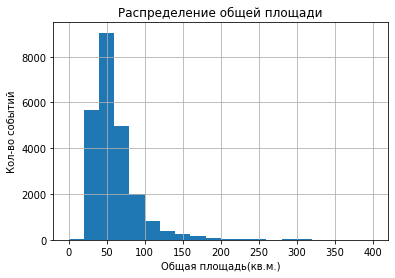

In [152]:
df.plot(kind = 'hist', y = 'total_area',bins = 20,grid = True, range=(0,400), legend=None)
plt.title("Распределение общей площади")
plt.xlabel("Общая площадь(кв.м.)")
plt.ylabel("Кол-во событий")
df['total_area'].describe()

Распределение похоже на распределение Пуассона. Медианная площадь продаваемых квартир в Лен. области 52 кв.м. Теперь посмотрим на цену за квадратный метр:

count      23,565.00
mean       99,405.84
std        50,389.43
min           111.83
25%        76,566.13
50%        95,000.00
75%       114,213.20
max     1,907,500.00
Name: price_per_m, dtype: float64

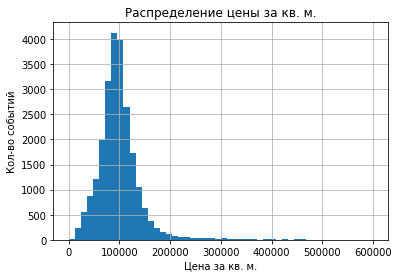

In [153]:
df.plot(kind = 'hist', y = 'price_per_m',bins = 50,grid = True, range=(0,600000), legend=None)
plt.title("Распределение цены за кв. м.")
plt.xlabel("Цена за кв. м.")
plt.ylabel("Кол-во событий")
df['price_per_m'].describe()

Распределение похоже на нормальное распределение. Медианная цена за кв. м. продаваемых квартир в Лен. области 95000 каких-то единиц. Теперь посмотрим на число комнат:

count   23,565.00
mean         2.08
std          1.07
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

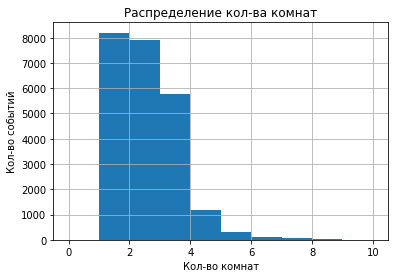

In [154]:
df.plot(kind = 'hist', y = 'rooms',bins = 10,grid = True, range=(0,10), legend=None)
plt.title("Распределение кол-ва комнат")
plt.xlabel("Кол-во комнат")
plt.ylabel("Кол-во событий")
df['rooms'].describe()

Распределение похоже на распределение Пуассона. Медианное кол-во комнат равно двум, но есть и квартиры с почти 20 комнатами. Теперь посмотрим на высоту потолков:

count   23,565.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

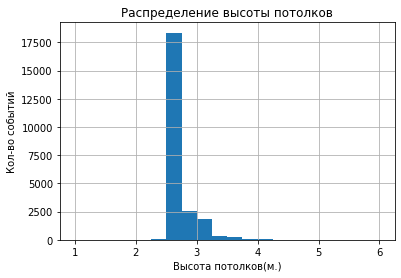

In [155]:
df.plot(kind = 'hist', y = 'ceiling_height',bins = 20,grid = True, range=(1,6), legend=None)
plt.title("Распределение высоты потолков")
plt.xlabel("Высота потолков(м.)")
plt.ylabel("Кол-во событий")
df['ceiling_height'].describe()

Распределение похоже на распределение Пуассона. Медианная высота потолков равна 2,65 м., но есть помещение со 100 метровым потолком, непохоже на правду. Теперь посмотрим на время продажи.

### Исследование количества времени для продажи квартиры

count   20,394.00
mean       180.74
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

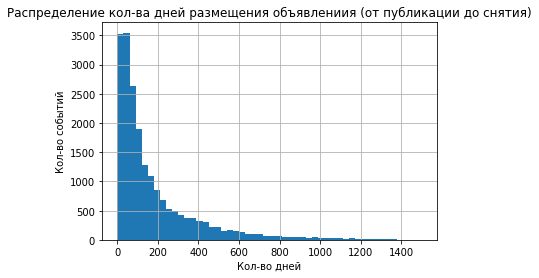

In [156]:
df.plot(kind = 'hist', y = 'days_exposition',bins = 50,grid = True, range=(0,1500), legend=None)
plt.title("Распределение кол-ва дней размещения объявлениия (от публикации до снятия)")
plt.xlabel("Кол-во дней")
plt.ylabel("Кол-во событий")
df['days_exposition'].describe()

Среднее и медиана у нас получились 156 дней и 73 дня соответственно. То, что среднее выше медианы, обычно свидетельствует о том, что сверху у распределения «длинный хвост», распределение похоже на распределение Пуассона. Необычно быстрые продажи соответствуют диапазону 0-22 дня, обычно продажа происходит за 23-198 дней. А очень долгие продажи идут уже визуально начиная с 800 дней, а по квартилям если смотреть, то уже 200 дней это очень долго.

### Анализ редких и выбивающихся значений

В этом разделе мы исследуем колонки total_area, price_per_m, rooms, ceiling_height и days_exposition.

-4.550000000000004 114.25


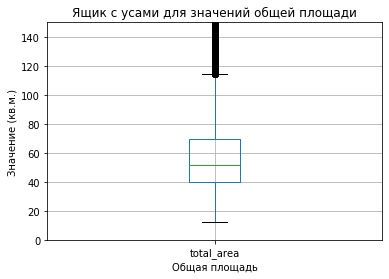

In [157]:
plt.ylim(0, 150)
df.boxplot(column='total_area')#визуально видно, что выбросы начинатся примерно со 120 кв.м.
plt.title("Ящик с усами для значений общей площади")
plt.xlabel("Общая площадь")
plt.ylabel("Значение (кв.м.)")
q1 = df['total_area'].quantile(0.25)
q3 = df['total_area'].quantile(0.75)
iqr = q3 - q1
bot_border = q1 - iqr*1.5
top_border = q3 + iqr*1.5
print(bot_border, top_border)#нижний не пригодится, просто посмотреть

20095.516270743254 170683.80698882308


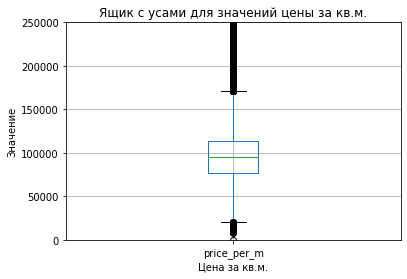

In [158]:
plt.ylim(0, 250000)
df.boxplot(column='price_per_m')#здесь уже видны выбросы как сверху так и снизу, точные пределы узнаем позднее
plt.title("Ящик с усами для значений цены за кв.м.")
plt.xlabel("Цена за кв.м.")
plt.ylabel("Значение")
q1 = df['price_per_m'].quantile(0.25)
q3 = df['price_per_m'].quantile(0.75)
iqr = q3 - q1
bot_border = q1 - iqr*1.5
top_border = q3 + iqr*1.5
print(bot_border, top_border)

-2.0 6.0


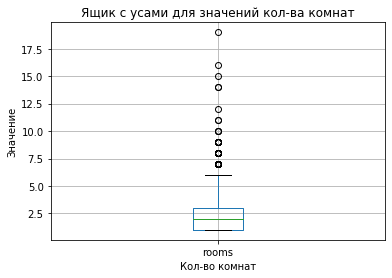

In [159]:
df.boxplot(column='rooms')#а здесь у нас достаточно мало выбросов, почти чистые данные
plt.title("Ящик с усами для значений кол-ва комнат")
plt.xlabel("Кол-во комнат")
plt.ylabel("Значение")
q1 = df['rooms'].quantile(0.25)
q3 = df['rooms'].quantile(0.75)
iqr = q3 - q1
bot_border = q1 - iqr*1.5
top_border = q3 + iqr*1.5
print(bot_border, top_border)#опять нижний не пригодится

2.45 2.8500000000000005


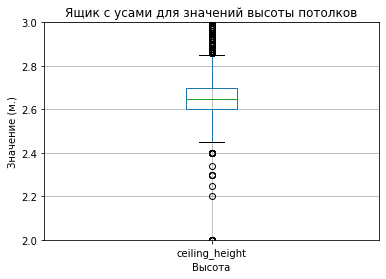

In [160]:
plt.ylim(2, 3)
df.boxplot(column='ceiling_height')#здесь у нас снизу выбросов меньше, чем сверху
plt.title("Ящик с усами для значений высоты потолков")
plt.xlabel("Высота")
plt.ylabel("Значение (м.)")
q1 = df['ceiling_height'].quantile(0.25)
q3 = df['ceiling_height'].quantile(0.75)
iqr = q3 - q1
bot_border = q1 - iqr*1.5
top_border = q3 + iqr*1.5
print(bot_border, top_border)

-234.0 510.0


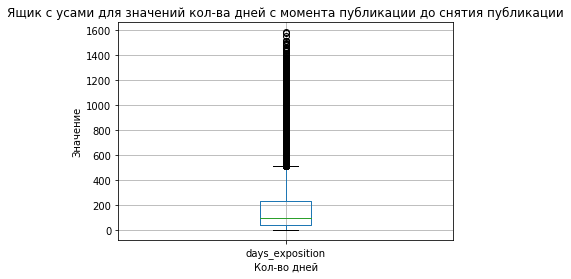

In [161]:
df.boxplot(column='days_exposition')#выбросов много и начинаются примерно с 500 дней
plt.title("Ящик с усами для значений кол-ва дней с момента публикации до снятия публикации")
plt.xlabel("Кол-во дней")
plt.ylabel("Значение")
q1 = df['days_exposition'].quantile(0.25)
q3 = df['days_exposition'].quantile(0.75)
iqr = q3 - q1
bot_border = q1 - iqr*1.5
top_border = q3 + iqr*1.5
print(bot_border, top_border)

Оставляем во фрейме значения удовлетворяющие по IQR границам выбросов.

In [162]:
new_data = df.query('total_area < 114.25 and 20095 < price_per_m < 170683 and rooms < 6 and 2.45 < ceiling_height < 2.85 and days_exposition < 510')
print('Значений отброшено\n', (df.count() - new_data.count()))
        
#df.info()
new_data.info()

Значений отброшено
 total_images            7630
last_price              7630
total_area              7630
price_per_m             7630
first_day_exposition    7630
week_day                7630
month                   7630
year                    7630
rooms                   7630
ceiling_height          7630
floors_total            7630
living_area             7630
living_to_total         7630
floor                   7630
floor_category          7630
is_apartment            7630
studio                  7630
open_plan               7630
kitchen_area            7630
kitchen_to_total        7630
balcony                 7630
locality_name           7630
airports_nearest        7630
city_сenters_nearest    7630
parks_around3000        7630
parks_nearest           7630
ponds_around3000        7630
ponds_nearest           7630
days_exposition         4459
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15935 entries, 1 to 23695
Data columns (total 29 columns):
total_images     

Мы достаточно сильно покосили данные, но зато оставили все самое частотное. В размах наших «усов» попали нормальные значения, а за пределами находятся выбросы, от которых мы и избавились.

### Исследование факторов, влияющих на стоимость квартиры

Здесь мы изучим, какие факторы больше всего влияют на стоимость квартиры. Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

-0.01532286715962745

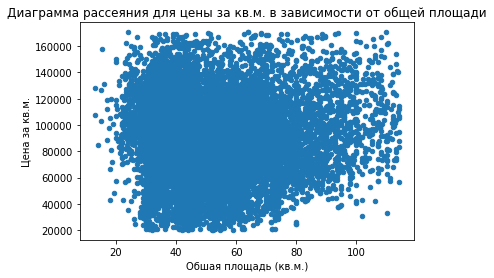

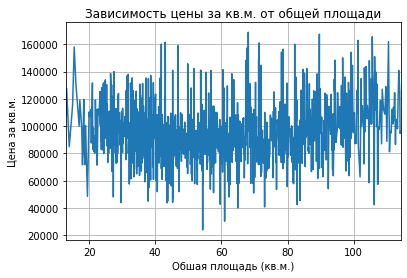

In [163]:
new_data.plot(x='total_area', y='price_per_m', kind='scatter')
plt.title("Диаграмма рассеяния для цены за кв.м. в зависимости от общей площади")
plt.xlabel("Обшая площадь (кв.м.)")
plt.ylabel("Цена за кв.м.")
plt.show
new_data.pivot_table(index='total_area', values='price_per_m').plot(grid=True, legend=None)
plt.title("Зависимость цены за кв.м. от общей площади")
plt.xlabel("Обшая площадь (кв.м.)")
plt.ylabel("Цена за кв.м.")
new_data['total_area'].corr(new_data['price_per_m'])

Корреляция говорит нам, что связи нет, она почти нулевая. По графикам ничего не видно, сделаем их менее шумными.

Text(0, 0.5, 'Цена за кв.м.')

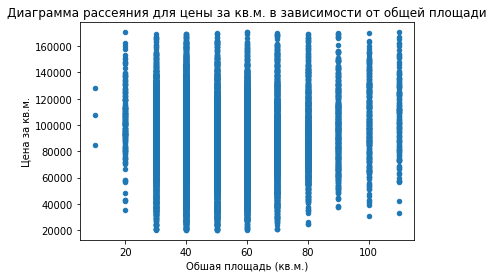

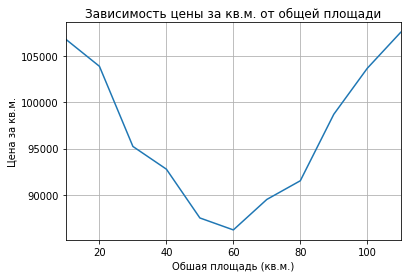

In [164]:
new_data['round_total_area'] = new_data['total_area'].round(-1)
new_data.plot(x='round_total_area', y='price_per_m', kind='scatter')
plt.title("Диаграмма рассеяния для цены за кв.м. в зависимости от общей площади")
plt.xlabel("Обшая площадь (кв.м.)")
plt.ylabel("Цена за кв.м.")
plt.show
new_data.pivot_table(index='round_total_area', values='price_per_m').plot(grid=True, legend=None)
plt.title("Зависимость цены за кв.м. от общей площади")
plt.xlabel("Обшая площадь (кв.м.)")
plt.ylabel("Цена за кв.м.")

Графики нам тоже сказали, что связи линейной нет. Смотрим на число комнат:

-0.19662003495437422

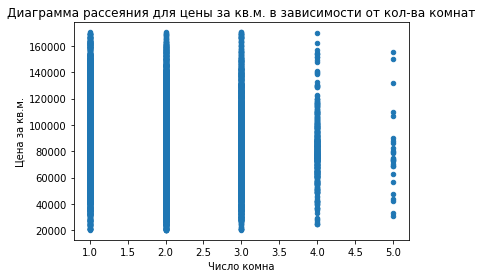

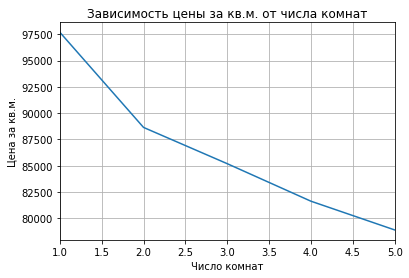

In [165]:
new_data.plot(x='rooms', y='price_per_m', kind='scatter')
plt.title("Диаграмма рассеяния для цены за кв.м. в зависимости от кол-ва комнат")
plt.xlabel("Число комна")
plt.ylabel("Цена за кв.м.")
plt.show
new_data.pivot_table(index='rooms', values='price_per_m').plot(grid=True, legend=None)
plt.title("Зависимость цены за кв.м. от числа комнат")
plt.xlabel("Число комнат")
plt.ylabel("Цена за кв.м.")
new_data['rooms'].corr(new_data['price_per_m'])

Есть маленькая обратня связь, то есть с ростом количества комнат, цена за квадратный метр немного падает, но связь слабая. Теперь смотрим на удаленность от центра.

-0.1898996078249564

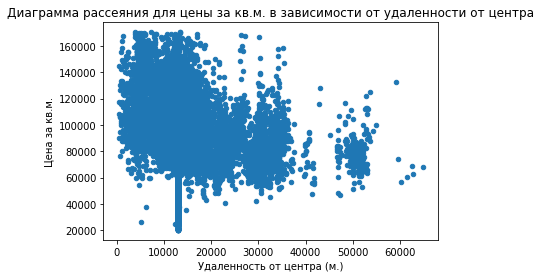

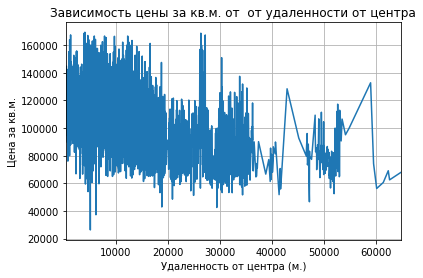

In [166]:
new_data.plot(x='city_сenters_nearest', y='price_per_m', kind='scatter')
plt.title("Диаграмма рассеяния для цены за кв.м. в зависимости от удаленности от центра")
plt.xlabel("Удаленность от центра (м.)")
plt.ylabel("Цена за кв.м.")
plt.show
new_data.pivot_table(index='city_сenters_nearest', values='price_per_m').plot(grid=True, legend=None)
plt.title("Зависимость цены за кв.м. от  от удаленности от центра")
plt.xlabel("Удаленность от центра (м.)")
plt.ylabel("Цена за кв.м.")
new_data['city_сenters_nearest'].corr(new_data['price_per_m'])

Опять шумно, но видно немного, что маленькая обратная связь есть, с увеличением расстояния от центра, цена падает немного. Почистим сейчас:

Text(0, 0.5, 'Цена за кв.м.')

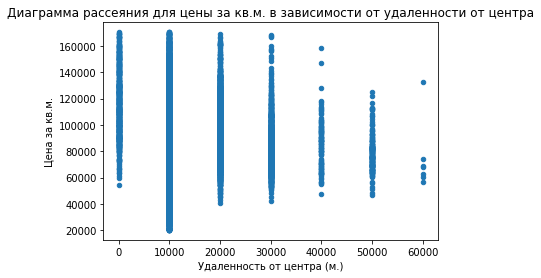

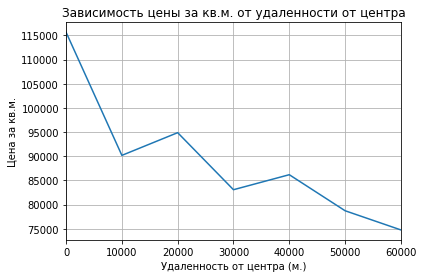

In [167]:
new_data['round_city_сenters_nearest'] = new_data['city_сenters_nearest'].round(-4)
new_data.plot(x='round_city_сenters_nearest', y='price_per_m', kind='scatter')
plt.title("Диаграмма рассеяния для цены за кв.м. в зависимости от удаленности от центра")
plt.xlabel("Удаленность от центра (м.)")
plt.ylabel("Цена за кв.м.")
plt.show
new_data.pivot_table(index='round_city_сenters_nearest', values='price_per_m').plot(grid=True, legend=None)
plt.title("Зависимость цены за кв.м. от удаленности от центра")
plt.xlabel("Удаленность от центра (м.)")
plt.ylabel("Цена за кв.м.")

Теперь и на графике лучше видна эта слабая связь. Теперь посомтрим связь с этажом.

Text(0, 0.5, 'Цена за кв.м')

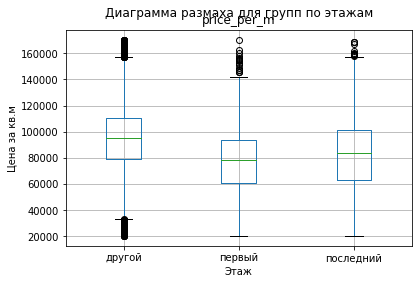

In [168]:
new_data.boxplot(column='price_per_m', by='floor_category')
plt.suptitle('Диаграмма размаха для групп по этажам')
#plt.title("Диаграмма размаха для групп по этажам")
plt.xlabel("Этаж")
plt.ylabel("Цена за кв.м")
#new_data.info()

Здесь корреляцию мы не посчитаем, зато можно построить диаграммы размаха для каждой категории и видно, что на первом этаже подешевле квартиры, а подороже немного квартиры с любого другого этажа кроме последнего, на последнем этаже ситация средняя между первым и другими этажами. Дальше смотрим на зависимость от даты размещения:

-0.0004018404042609803

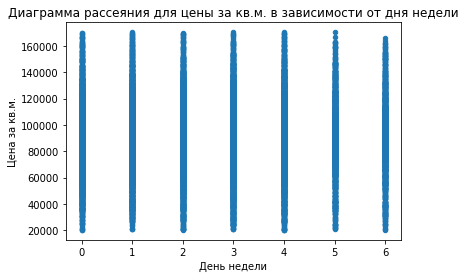

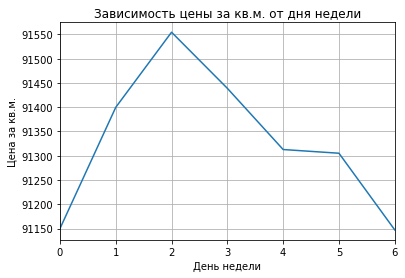

In [169]:
new_data.plot(x='week_day', y='price_per_m', kind='scatter')
plt.title("Диаграмма рассеяния для цены за кв.м. в зависимости от дня недели")
plt.xlabel("День недели")
plt.ylabel("Цена за кв.м.")
plt.show
new_data.pivot_table(index='week_day', values='price_per_m').plot(grid=True, legend=None)
plt.title("Зависимость цены за кв.м. от дня недели")
plt.xlabel("День недели")
plt.ylabel("Цена за кв.м.")
new_data['week_day'].corr(new_data['price_per_m'])

От дня недели зависимости можно сказать, что нет.Цена растет в первой половине недели, потом во второй падает, единственный более менее стабильный день это суббота. Теперь месяц:

0.009405805992144498

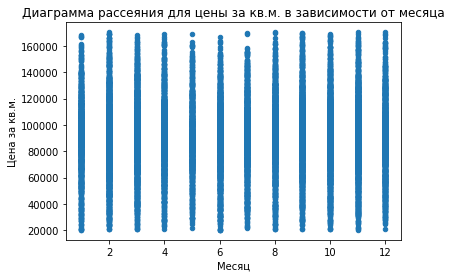

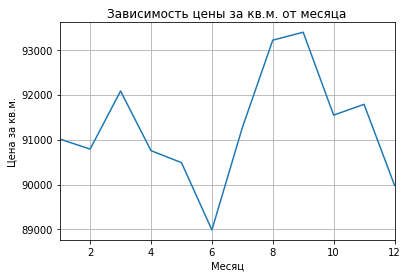

In [170]:
new_data.plot(x='month', y='price_per_m', kind='scatter')
plt.title("Диаграмма рассеяния для цены за кв.м. в зависимости от месяца")
plt.xlabel("Месяц")
plt.ylabel("Цена за кв.м.")
plt.show
new_data.pivot_table(index='month', values='price_per_m').plot(grid=True, legend=None)
plt.title("Зависимость цены за кв.м. от месяца")
plt.xlabel("Месяц")
plt.ylabel("Цена за кв.м.")
new_data['month'].corr(new_data['price_per_m'])

Здесь тоже не видно связи. А по годам:

0.07722780821792898

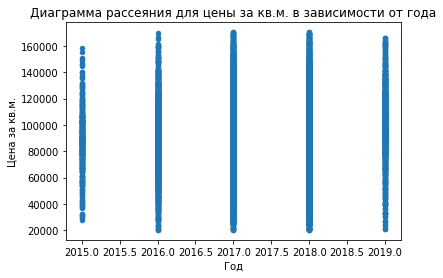

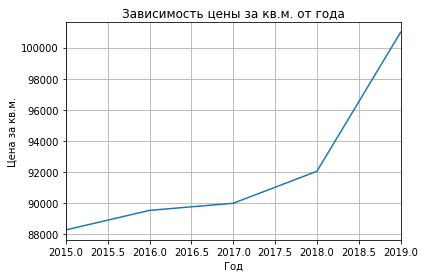

In [171]:
new_data.plot(x='year', y='price_per_m', kind='scatter')
plt.title("Диаграмма рассеяния для цены за кв.м. в зависимости от года")
plt.xlabel("Год")
plt.ylabel("Цена за кв.м.")
plt.show
new_data.pivot_table(index='year', values='price_per_m').plot(grid=True, legend=None)
plt.title("Зависимость цены за кв.м. от года")
plt.xlabel("Год")
plt.ylabel("Цена за кв.м.")
new_data['year'].corr(new_data['price_per_m'])

А тут можно заметить, что с 2015 года цена растет, но линейно не зависит можно так сказать. 

### Вывод исследования зависимостей

В принципе были обнаружены зависимоти цены за квадратный метр от года, от удаленности от центра, от количества комнат. Численно они маленькие, но они есть.

### Анализ десяти населённых пунктов с наибольшим числом объявлений

Выбираем 10 населённых пунктов с наибольшим числом объявлений. Потом считаем среднюю цену квадратного метра в этих населённых пунктах и выделяем населённые пункты с самой высокой и низкой стоимостью жилья.

In [172]:
top_10 = new_data['locality_name'].value_counts().head(10).index
print(top_10)#это наш топ 10

Index(['Санкт-Петербург', ' Мурино', ' Шушары', 'Всеволожск', ' Парголово',
       'Колпино', ' Кудрово', 'Пушкин', 'Гатчина', 'Выборг'],
      dtype='object')


Топ 10 нашли.

In [173]:
new_data[new_data['locality_name'].isin(top_10)].groupby('locality_name').agg({'price_per_m':'mean'})

,price_per_m
locality_name,
Кудрово,"92,729.30"
Мурино,"85,767.76"
Парголово,"89,367.66"
Шушары,"77,689.51"
Всеволожск,"66,712.28"
Выборг,"57,076.75"
Гатчина,"68,334.10"
Колпино,"74,885.81"
Пушкин,"100,172.25"


Посчитали среднее в этих городах. А теперь найдем самую высокую среднюю цену и самую низкую.

In [174]:
(
    new_data[new_data['locality_name'].isin(top_10)]
    .groupby('locality_name').agg({'price_per_m':'mean'}).sort_values(by='price_per_m').head(1)#самая низкая средняя цена
)

,price_per_m
locality_name,
Выборг,"57,076.75"


In [175]:
(
    new_data[new_data['locality_name'].isin(top_10)]
    .groupby('locality_name').agg({'price_per_m':'mean'}).sort_values(by='price_per_m').tail(1)#самая высокая средняя цена
)

,price_per_m
locality_name,
Санкт-Петербург,"103,647.66"


Мы нашли самую высокую и низкую цену в топе 10 населенных пунктов по наибольшему числу объявлений.

### Анализ изменения цены по степени удалённости от центра

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Наша задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округляем до целых значений. После этого считаем среднюю цену для каждого километра. Потом строим график: он будет показывать, как цена зависит от удалённости от центра. Определяем границу, где график сильно меняется, — это и будет центральная зона.

,total_images,last_price,total_area,price_per_m,first_day_exposition,week_day,month,year,rooms,ceiling_height,...,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,round_total_area,round_city_сenters_nearest,round_spb_сenters_nearest
9,18,"5,400,000.00",61.00,"88,524.59",2017-02-26,6,2,2017,3,2.50,...,50898,15008,0,460,0,504,289.00,60.00,20000,15.00
10,5,"5,050,000.00",39.60,"127,525.25",2017-11-16,3,11,2017,1,2.67,...,38357,13878,1,310,2,553,137.00,40.00,10000,14.00
15,16,"4,650,000.00",39.00,"119,230.77",2017-11-18,5,11,2017,1,2.65,...,12900,14259,1,590,1,296,19.00,40.00,10000,14.00
18,8,"3,250,000.00",31.00,"104,838.71",2017-01-27,4,1,2017,1,2.50,...,44060,10842,1,759,0,504,168.00,30.00,10000,11.00
21,13,"3,200,000.00",31.60,"101,265.82",2018-03-14,2,3,2018,1,2.65,...,36064,9722,1,248,0,504,310.00,30.00,10000,10.00


Text(0, 0.5, 'Цена за кв.м.')

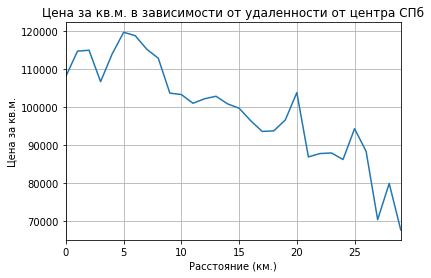

In [176]:
spb_grouped = new_data.query('locality_name == "Санкт-Петербург"')
spb_grouped['round_spb_сenters_nearest'] = (spb_grouped['city_сenters_nearest']/1000).round()#расстояние в км округленное
display(spb_grouped.head())
spb_grouped.pivot_table(index='round_spb_сenters_nearest', values='price_per_m', aggfunc='median').plot(grid=True, legend=None)
plt.title("Цена за кв.м. в зависимости от удаленности от центра СПб")
plt.xlabel("Расстояние (км.)")
plt.ylabel("Цена за кв.м.")

Можно сделать предположение, что наша граница проходит на 6 км. от центра, все что внутри 6 км. - центральная зона. Я так подумал, потому что по графику, после 6 км. от центра можно увидеть сильное падение цены за квадратный метр, повышение стоимости на 20 км. свожу на расположение у КАД, а дальше скачок у 25 км. не знаю почему, мне кажется, это уже не Санк-Петербург, если честно.

### Сравнение выводов по квартирам в центре и общих выводов по всему городу

Выделим сегмент квартир в центре и проанализируем эту территорию, изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

Площадь квартир во всей Лен. области
 count   15,935.00
mean        51.49
std         17.59
min         13.00
25%         38.00
50%         47.00
75%         61.50
max        114.20
Name: total_area, dtype: float64
Площадь квартир в центре СПб
 count   901.00
mean     65.56
std      22.00
min      13.20
25%      47.00
50%      64.00
75%      83.00
max     114.20
Name: total_area, dtype: float64


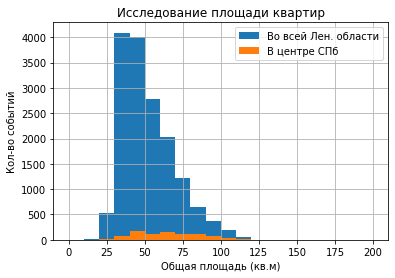

In [177]:
centr_spb = spb_grouped.query('round_spb_сenters_nearest <= 6')
new_data['total_area'].plot(kind = 'hist',bins = 20,grid = True,alpha=1, range=(0,200))
centr_spb['total_area'].plot(kind = 'hist',bins = 20,grid = True,alpha=1, range=(0,200))
plt.xlabel("Общая площадь (кв.м)")
plt.ylabel("Кол-во событий")
plt.legend(['Во всей Лен. области', 'В центре СПб'])
plt.title('Исследование площади квартир')
print('Площадь квартир во всей Лен. области\n', new_data['total_area'].describe())
print('Площадь квартир в центре СПб\n', centr_spb['total_area'].describe())

В центре Санкт-Петербурга квартиры чуть больше по площади в среднем, в сравнении со всей Лен. областью.

Цена за кв. м. во всей Лен. области
 count    15,935.00
mean     91,354.00
std      26,789.22
min      20,192.31
25%      75,000.00
50%      91,981.13
75%     107,692.31
max     170,464.90
Name: price_per_m, dtype: float64
Цена за кв. м. в центре СПб
 count       901.00
mean    117,715.80
std      24,853.51
min      26,250.00
25%      99,156.12
50%     116,027.87
75%     137,176.94
max     170,312.50
Name: price_per_m, dtype: float64


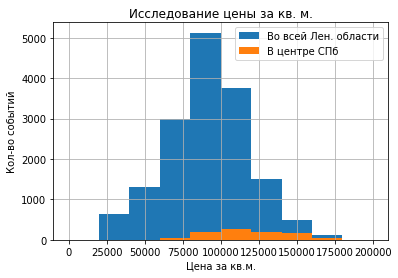

In [178]:
new_data['price_per_m'].plot(kind = 'hist',bins = 10,grid = True, range=(0,200000))
centr_spb['price_per_m'].plot(kind = 'hist',bins = 10,grid = True, range=(0,200000))
plt.xlabel("Цена за кв.м.")
plt.ylabel("Кол-во событий")
plt.legend(['Во всей Лен. области', 'В центре СПб'])
plt.title('Исследование цены за кв. м.')
print('Цена за кв. м. во всей Лен. области\n', new_data['price_per_m'].describe())
print('Цена за кв. м. в центре СПб\n', centr_spb['price_per_m'].describe())

Цена за квадрат в центре Санкт-Петербурга выше. Медианное занчение на 25000 единиц выше.

Кол-во комнат во всей Лен. области
 count   15,935.00
mean         1.87
std          0.85
min          1.00
25%          1.00
50%          2.00
75%          2.00
max          5.00
Name: rooms, dtype: float64
Кол-во комнат в центре СПб
 count   901.00
mean      2.27
std       0.93
min       1.00
25%       2.00
50%       2.00
75%       3.00
max       5.00
Name: rooms, dtype: float64


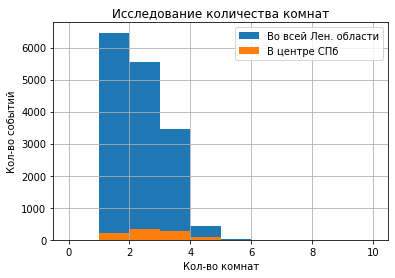

In [179]:
new_data['rooms'].plot(kind = 'hist',bins = 10,grid = True, range=(0,10))
centr_spb['rooms'].plot(kind = 'hist',bins = 10,grid = True, range=(0,10))
plt.xlabel("Кол-во комнат")
plt.ylabel("Кол-во событий")
plt.legend(['Во всей Лен. области', 'В центре СПб'])
plt.title('Исследование количества комнат')
print('Кол-во комнат во всей Лен. области\n', new_data['rooms'].describe())
print('Кол-во комнат в центре СПб\n', centr_spb['rooms'].describe())

В среднем чуть больше комнат в квартирах в центре Санкт-Петербурга, чем во всей Лен. области.

Высота потолков во всей Лен. области
 count   15,935.00
mean         2.63
std          0.08
min          2.46
25%          2.60
50%          2.65
75%          2.65
max          2.84
Name: ceiling_height, dtype: float64
Высота потолков в центре СПб
 count   901.00
mean      2.66
std       0.07
min       2.46
25%       2.65
50%       2.65
75%       2.65
max       2.84
Name: ceiling_height, dtype: float64


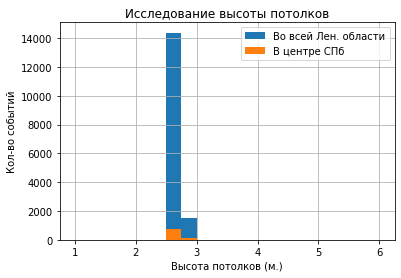

In [180]:
new_data['ceiling_height'].plot(kind = 'hist',bins = 20,grid = True, range=(1,6))
centr_spb['ceiling_height'].plot(kind = 'hist',bins = 20,grid = True, range=(1,6))
plt.xlabel("Высота потолков (м.)")
plt.ylabel("Кол-во событий")
plt.legend(['Во всей Лен. области', 'В центре СПб'])
plt.title('Исследование высоты потолков')
print('Высота потолков во всей Лен. области\n', new_data['ceiling_height'].describe())
print('Высота потолков в центре СПб\n', centr_spb['ceiling_height'].describe())

Высота потолков почти одинаковая, чуток повыше в центре на пару сантиметров. Теперь выделим взаимосвязи с ценой за кв. м. Сначала посмотрим на число комнат.

Лен. область -0.19662003495437422
Центр СПб -0.35454610767191436


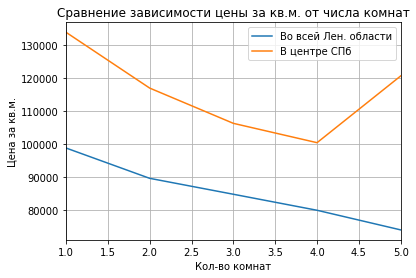

In [181]:
q = new_data.pivot_table(index='rooms', values='price_per_m', aggfunc='median').plot(grid=True)
centr_spb.pivot_table(index='rooms', values='price_per_m', aggfunc='median').plot(ax 
                    = q, grid=True, title='Сравнение зависимости цены за кв.м. от числа комнат')
plt.legend(['Во всей Лен. области', 'В центре СПб'])
plt.xlabel("Кол-во комнат")
plt.ylabel("Цена за кв.м.")
print('Лен. область', new_data['rooms'].corr(new_data['price_per_m']))
print('Центр СПб', centr_spb['rooms'].corr(new_data['price_per_m']))

На графике видно, что обратная связь более линейная у квартир в Лен. области, а в центре СПб есть скачок цены после 4х комнат. Хотя численно наоборот связь более сильная у квартир в центре СПб. Не знаю, чем это объяснить. Возможно этот скачок не влияет на все коэффициенте, потому что условно в центре только одна квартира с 5 комнатами продается

Лен. область -0.1898996078249564
Центр СПб 0.136551582781988


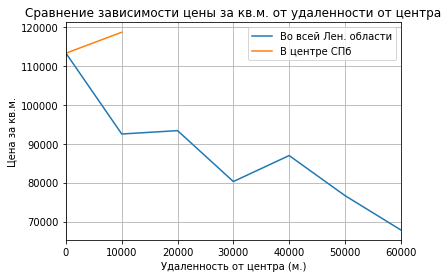

In [182]:
q = new_data.pivot_table(index='round_city_сenters_nearest', values='price_per_m', aggfunc='median').plot(grid=True)
centr_spb.pivot_table(index='round_city_сenters_nearest', values='price_per_m', aggfunc='median').plot(ax 
                    = q, grid=True, title='Сравнение зависимости цены за кв.м. от удаленности от центра')
plt.legend(['Во всей Лен. области', 'В центре СПб'])
plt.xlabel("Удаленность от центра (м.)")
plt.ylabel("Цена за кв.м.")
print('Лен. область', new_data['city_сenters_nearest'].corr(new_data['price_per_m']))
print('Центр СПб', centr_spb['city_сenters_nearest'].corr(new_data['price_per_m']))

Ну численно зависимости можно сказать нет, но в центре СПб по мере удаления от него, цена все же немного растет, а вот по всей Лен. области наоборот в целом падает.

Лен. область -0.0004018404042609803
Центр СПб 0.014249548864494026


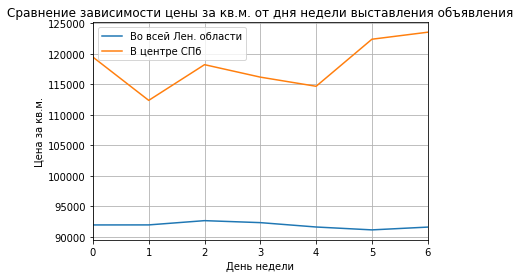

In [183]:
q = new_data.pivot_table(index='week_day', values='price_per_m', aggfunc='median').plot(grid=True)
centr_spb.pivot_table(index='week_day', values='price_per_m', aggfunc='median').plot(ax 
                    = q, grid=True, title='Сравнение зависимости цены за кв.м. от дня недели выставления объявления')
plt.legend(['Во всей Лен. области', 'В центре СПб'])
plt.xlabel("День недели")
plt.ylabel("Цена за кв.м.")
print('Лен. область', new_data['week_day'].corr(new_data['price_per_m']))
print('Центр СПб', centr_spb['week_day'].corr(new_data['price_per_m']))

В центре СПб, как и по всей Лен. области зависимости нет, небольшой рост к концу недели в центре, но это значительнее чем для всей Лен. области, где цена можно сказать стабильна всю неделю.

Лен. область 0.009405805992144498
Центр СПб -0.030304917919950252


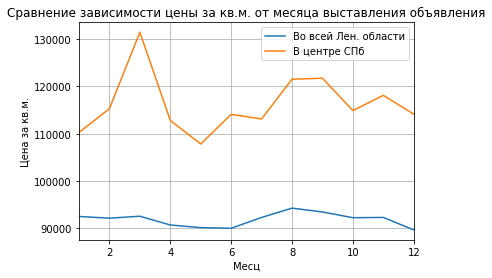

In [184]:
q = new_data.pivot_table(index='month', values='price_per_m', aggfunc='median').plot(grid=True)
centr_spb.pivot_table(index='month', values='price_per_m', aggfunc='median').plot(ax 
                    = q, grid=True, title='Сравнение зависимости цены за кв.м. от месяца выставления объявления')
plt.legend(['Во всей Лен. области', 'В центре СПб'])
plt.xlabel("Месц")
plt.ylabel("Цена за кв.м.")
print('Лен. область', new_data['month'].corr(new_data['price_per_m']))
print('Центр СПб', centr_spb['month'].corr(new_data['price_per_m']))

Тут тоже определенной линейной зависимости нет, но есть большой скачок в начале весны и всю весну падает цена. Потом плавно выходит на свой видимо обычный уровень около 12000 за м.кв. А в Лен. области все стабильнее, но за весну чуток проседает цена тоже, видимо это сезонность рынка недвижимости.

Лен. область 0.07722780821792898
Центр СПб 0.18604162198827973


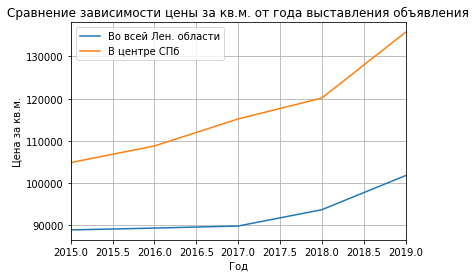

In [185]:
q = new_data.pivot_table(index='year', values='price_per_m', aggfunc='median').plot(grid=True)
centr_spb.pivot_table(index='year', values='price_per_m', aggfunc='median').plot(ax 
                    = q, grid=True, title='Сравнение зависимости цены за кв.м. от года выставления объявления')
plt.legend(['Во всей Лен. области', 'В центре СПб'])
plt.xlabel("Год")
plt.ylabel("Цена за кв.м.")
print('Лен. область', new_data['year'].corr(new_data['price_per_m']))
print('Центр СПб', centr_spb['year'].corr(new_data['price_per_m']))

Можно заметить плавный рост с 2015 года, он сказался примерно одинаково на цене как в центре СПб, так и во всей Лен. области. 

Text(0, 0.5, 'Цена за кв.м.')

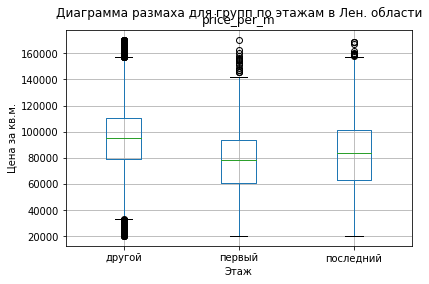

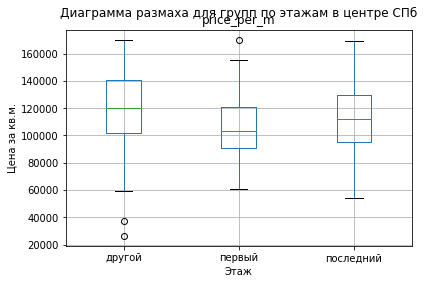

In [186]:
new_data.boxplot(column='price_per_m', by='floor_category')
plt.suptitle('Диаграмма размаха для групп по этажам в Лен. области')
plt.xlabel("Этаж")
plt.ylabel("Цена за кв.м.")
centr_spb.boxplot(column='price_per_m', by='floor_category')
plt.suptitle('Диаграмма размаха для групп по этажам в центре СПб')
plt.xlabel("Этаж")
plt.ylabel("Цена за кв.м.")
#new_data['floor_category'].plot(kind = 'box', column='price_per_m')
#centr_spb['floor_category'].plot(kind = 'box', column='price_per_m')
#plt.legend(['Высота потолков во всей Лен. области', 'Высота потолков в центре СПб'])
#plt.title('Исследование высоты потолков')

Корреляцию здесь не посчитаешь, но тенденции в центре СПб те же, что и во всей Лен. области. Видно, что на первом этаже подешевле квартиры, а подороже немного квартиры с любого другого этажа кроме последнего, на последнем этаже ситация средняя между первым и другими этажами.

### Вывод исследователького анализа центра СПб

Многие тенденции такие как зависимость цены за квадратный метр от этажа, года, месяца, чила комнат показали себя в центре СПб так же, как и во всей Лен. области, но некотрые показали иной характер, например, в конце недели цена за квадрат в центре повышается. В среднем цена за квадратный метр и общая площадь квартиры больше в центре, высота потолков такая же, как и в Лен. области. С количеством комнат в центре тоже в среднем тоже все примерно так же, как и в Лен. области. 

## Общий вывод

Мы проделали большой путь, сначала изучили данные, заполнили пропуски, сначала я думал оставить несколько столбцом с пропусками из-за нелогичности их заполнения, но потом пришлось их заполнить, потому что тип данных иначе не менялся. Дальше мы посчитали такие парамметры, как цена квадратного метра, день недели, месяц и год публикации объявления, этаж квартиры(варианты — первый, последний, другой), соотношение жилой и общей площади, а также отношение площади кухни к общей. Более детально изучили площадь, цену, число комнат, высоту потолков. Убрали редкие значения и выбросы. Дополнительно изучили вопрос времени продажи квартиры. Изучили факторы, которые могут влиять на цену за квадратный метр квартиры. Отобрали топ-10 населенных пунктов с наибольшим числом объявлений, посчитали в этом топе среднюю цену за квадратный метр и нашли города с самой маленькой средней ценой за квадратный метр и самой большой. Выяснили, какая область входит в центр Санкт-Петербурга и изучили отдельно предложения из центра в сравнении со всей Лен. областью.